In [1]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
DATASET_FILE_PATH = '../data/raw/heart_cleveland_upload.csv'

# Load raw data

In [3]:
df = pd.read_csv(DATASET_FILE_PATH)

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [5]:
df.shape

(297, 14)

In [6]:
df.dtypes

age            int64
sex            int64
cp             int64
trestbps       int64
chol           int64
fbs            int64
restecg        int64
thalach        int64
exang          int64
oldpeak      float64
slope          int64
ca             int64
thal           int64
condition      int64
dtype: object

In [7]:
cat_feature_list = [
    'sex',
    'cp',
    'fbs',
    'restecg',
    'exang',
    'slope',
    'thal',
    'ca',
]

num_feature_list = [
    'age',
    'trestbps',
    'chol',
    'thalach',
    'oldpeak',
]

target_name = 'condition' 

In [8]:
df.isna().mean()

age          0.0
sex          0.0
cp           0.0
trestbps     0.0
chol         0.0
fbs          0.0
restecg      0.0
thalach      0.0
exang        0.0
oldpeak      0.0
slope        0.0
ca           0.0
thal         0.0
condition    0.0
dtype: float64

In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


# Target

In [23]:
df[target_name].mean()

0.4612794612794613

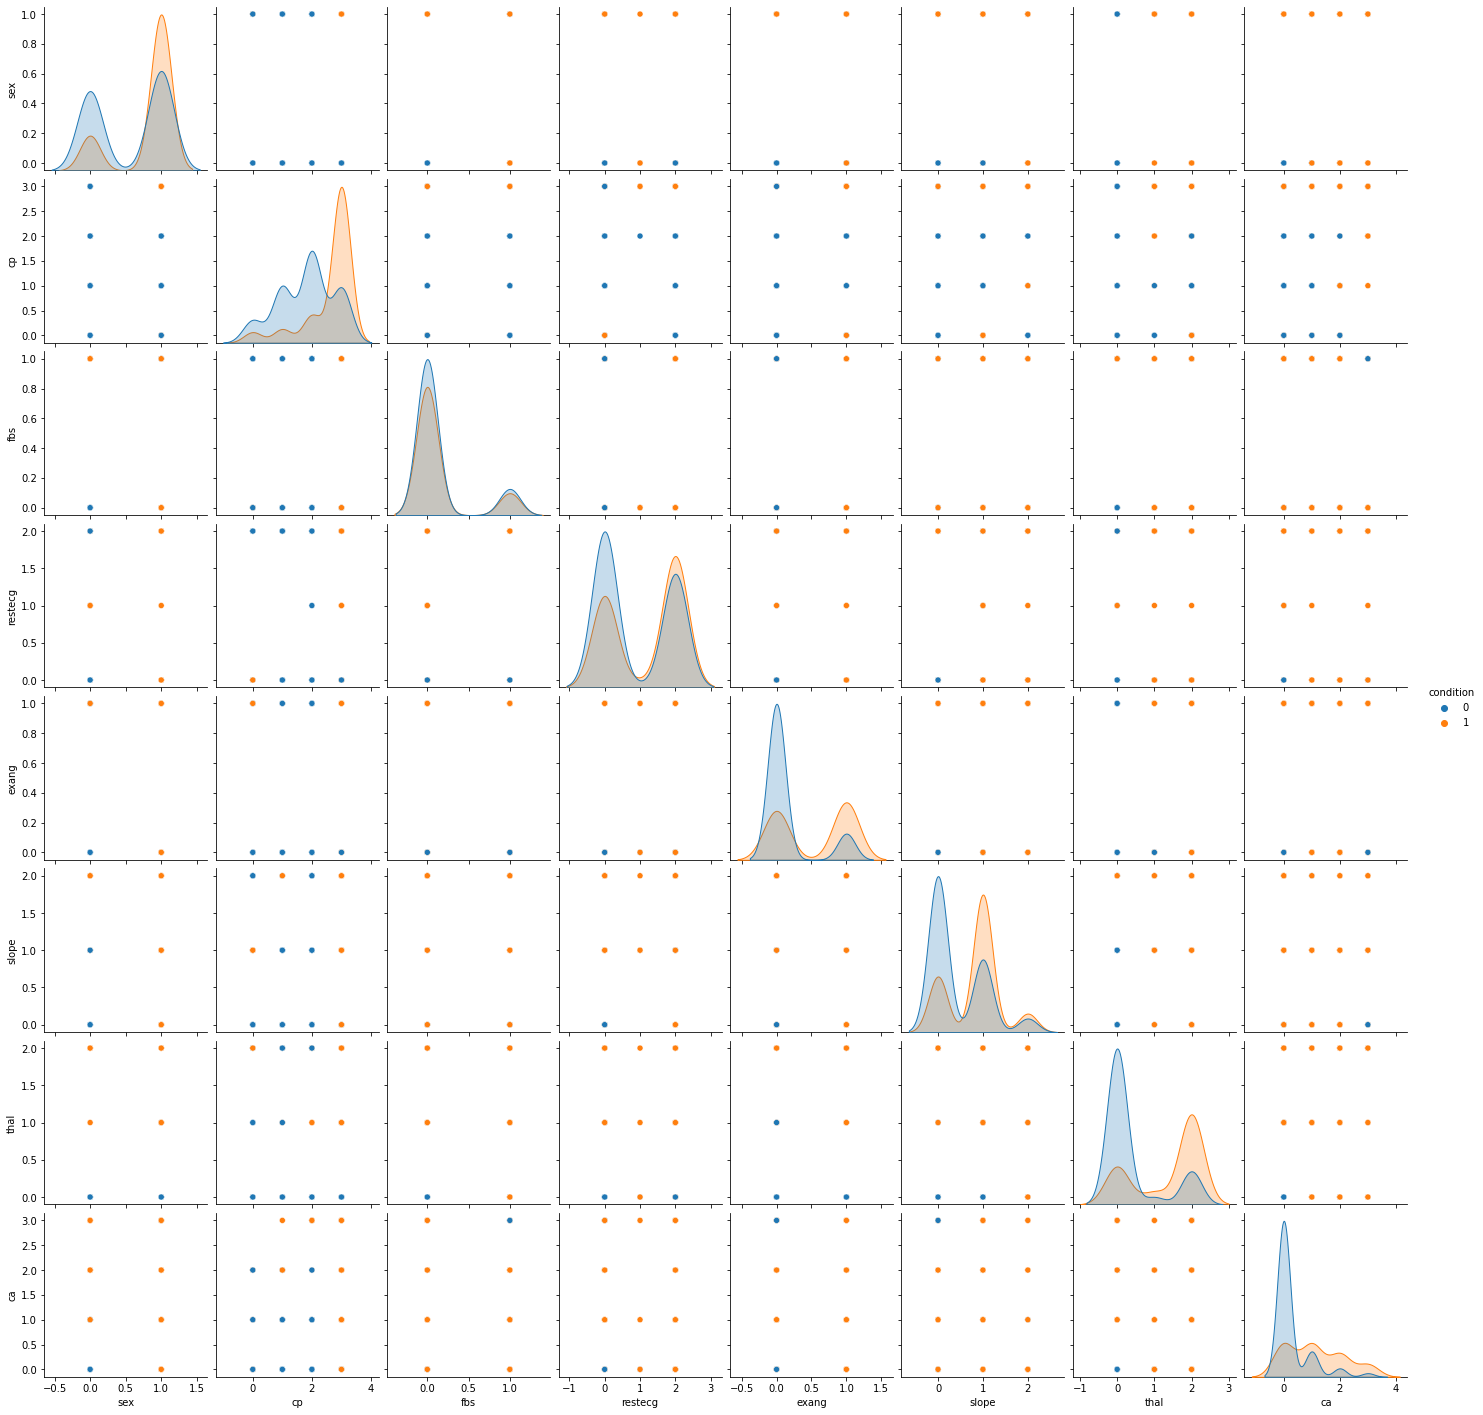

In [33]:
sns.pairplot(df[cat_feature_list + [target_name]], hue=target_name)
plt.show()

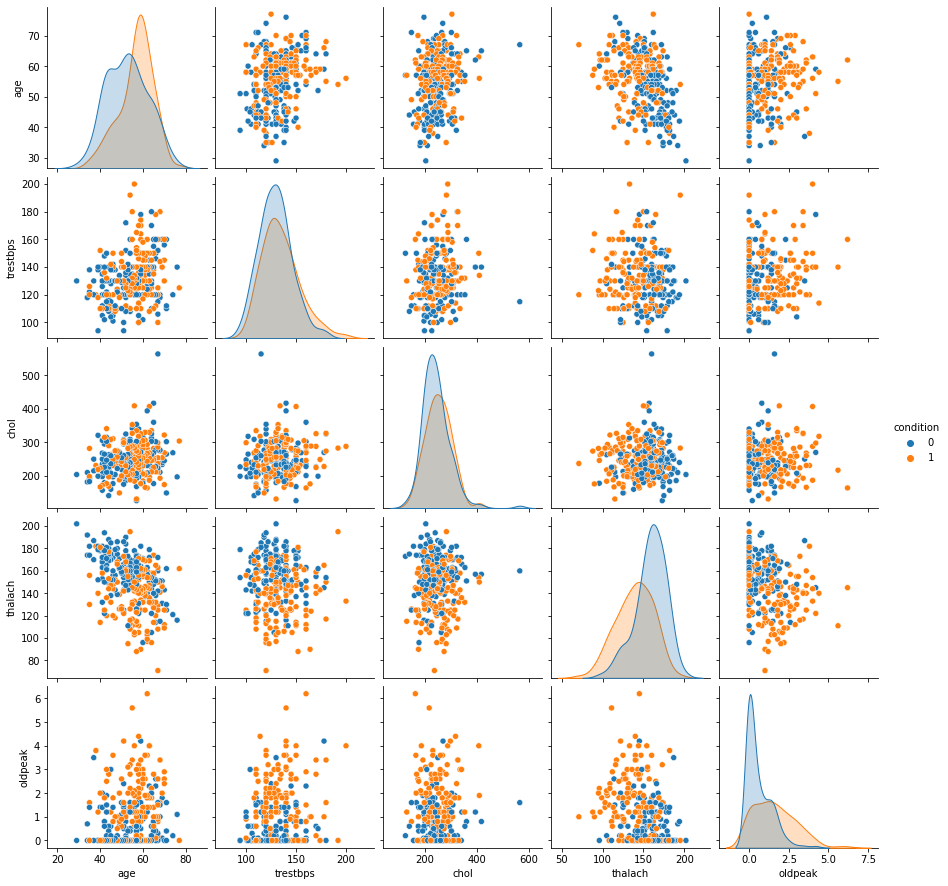

In [34]:
sns.pairplot(df[num_feature_list + [target_name]], hue=target_name)
plt.show()

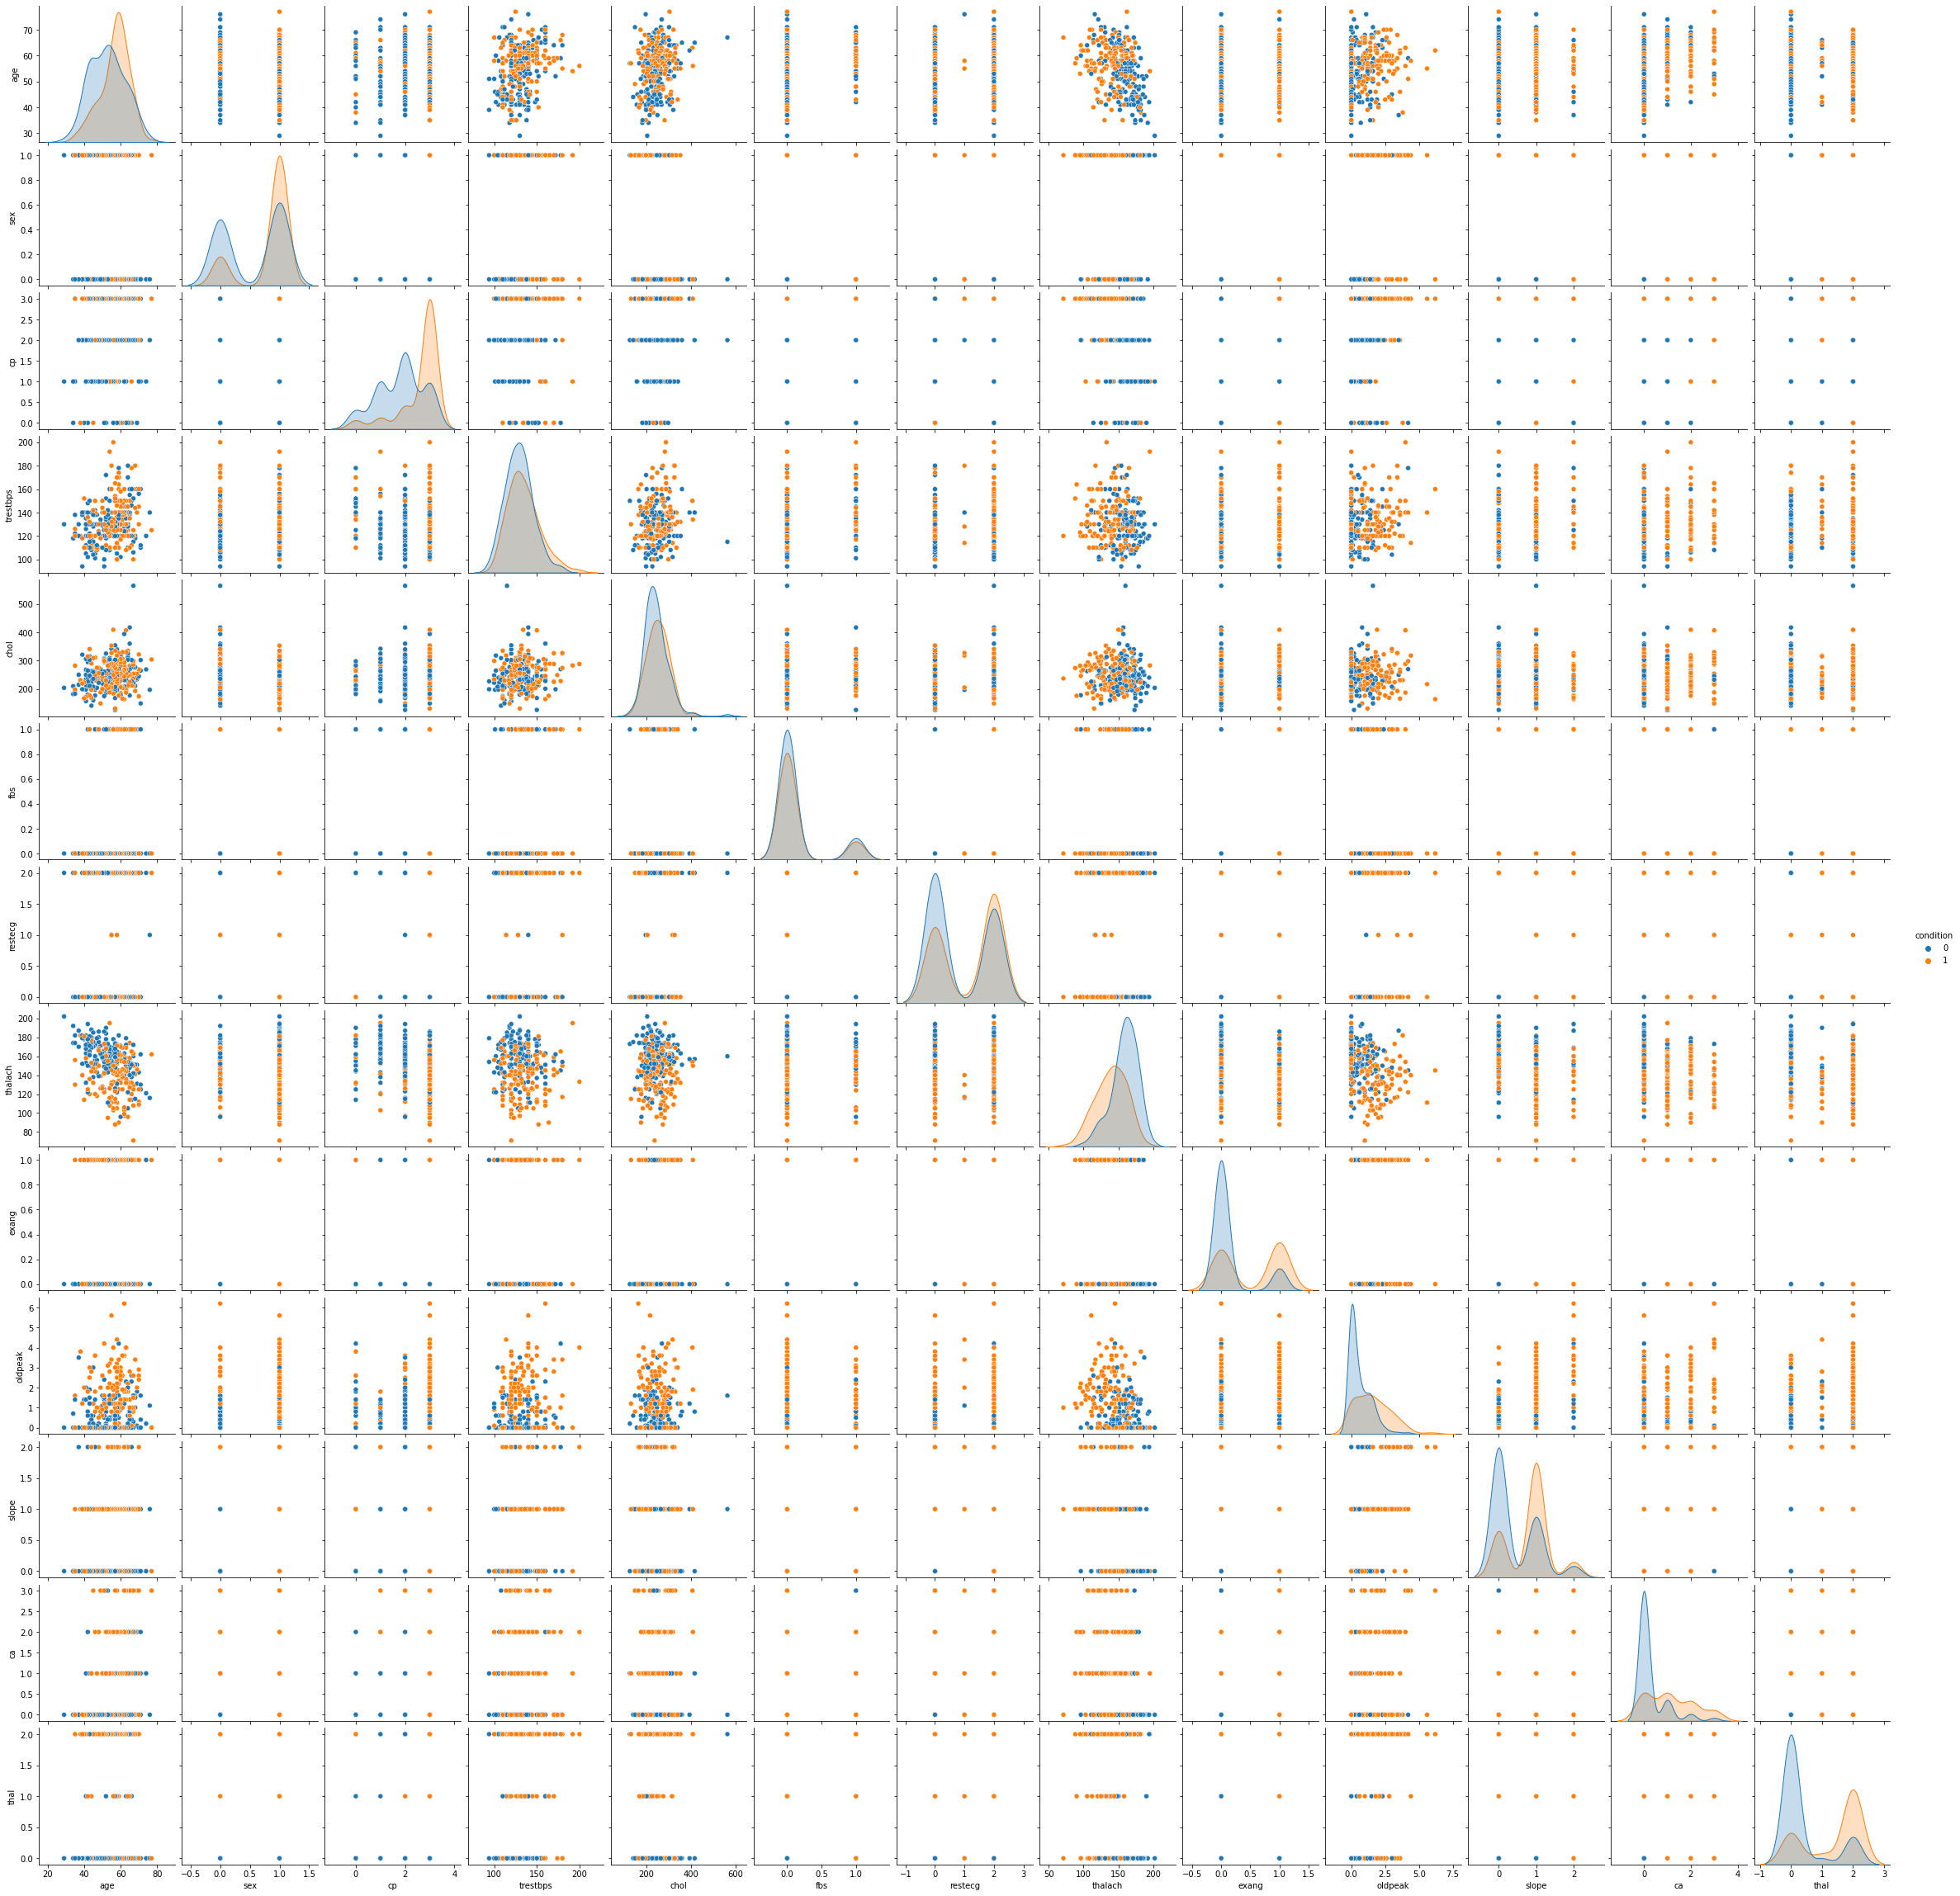

In [39]:
sns.pairplot(df, hue=target_name)
plt.plot()

In [38]:
df.groupby(target_name).mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
condition,,,,,,,,,,,,,
0,52.643750,0.556250,1.793750,129.175000,243.493750,0.143750,0.843750,158.581250,0.143750,0.598750,0.412500,0.275000,0.375000
1,56.759124,0.817518,2.583942,134.635036,251.854015,0.145985,1.175182,139.109489,0.540146,1.589051,0.824818,1.145985,1.372263


[]

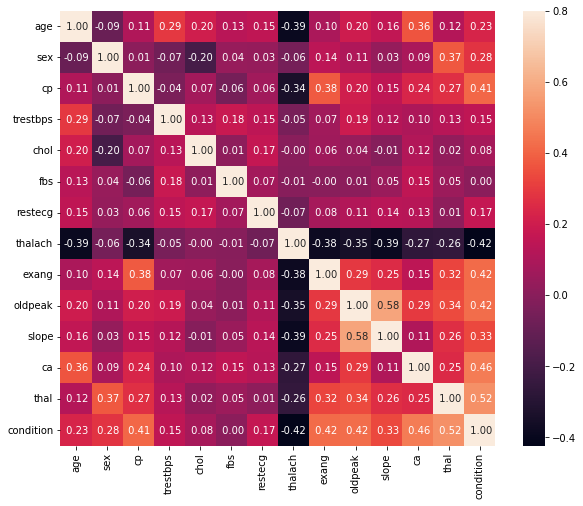

In [59]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), vmax=.8, annot=True, fmt=' .2f', square=True)
plt.plot()

[]

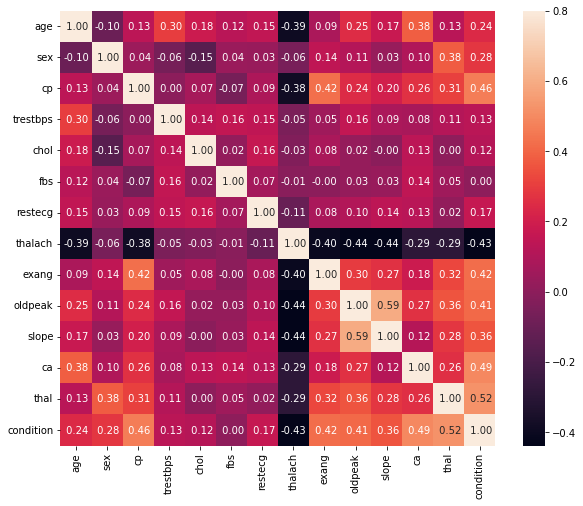

In [60]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(method='spearman'), vmax=.8, annot=True, fmt=' .2f', square=True)
plt.plot()

# cat features

In [35]:
cat_feature_list

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal', 'ca']

[]

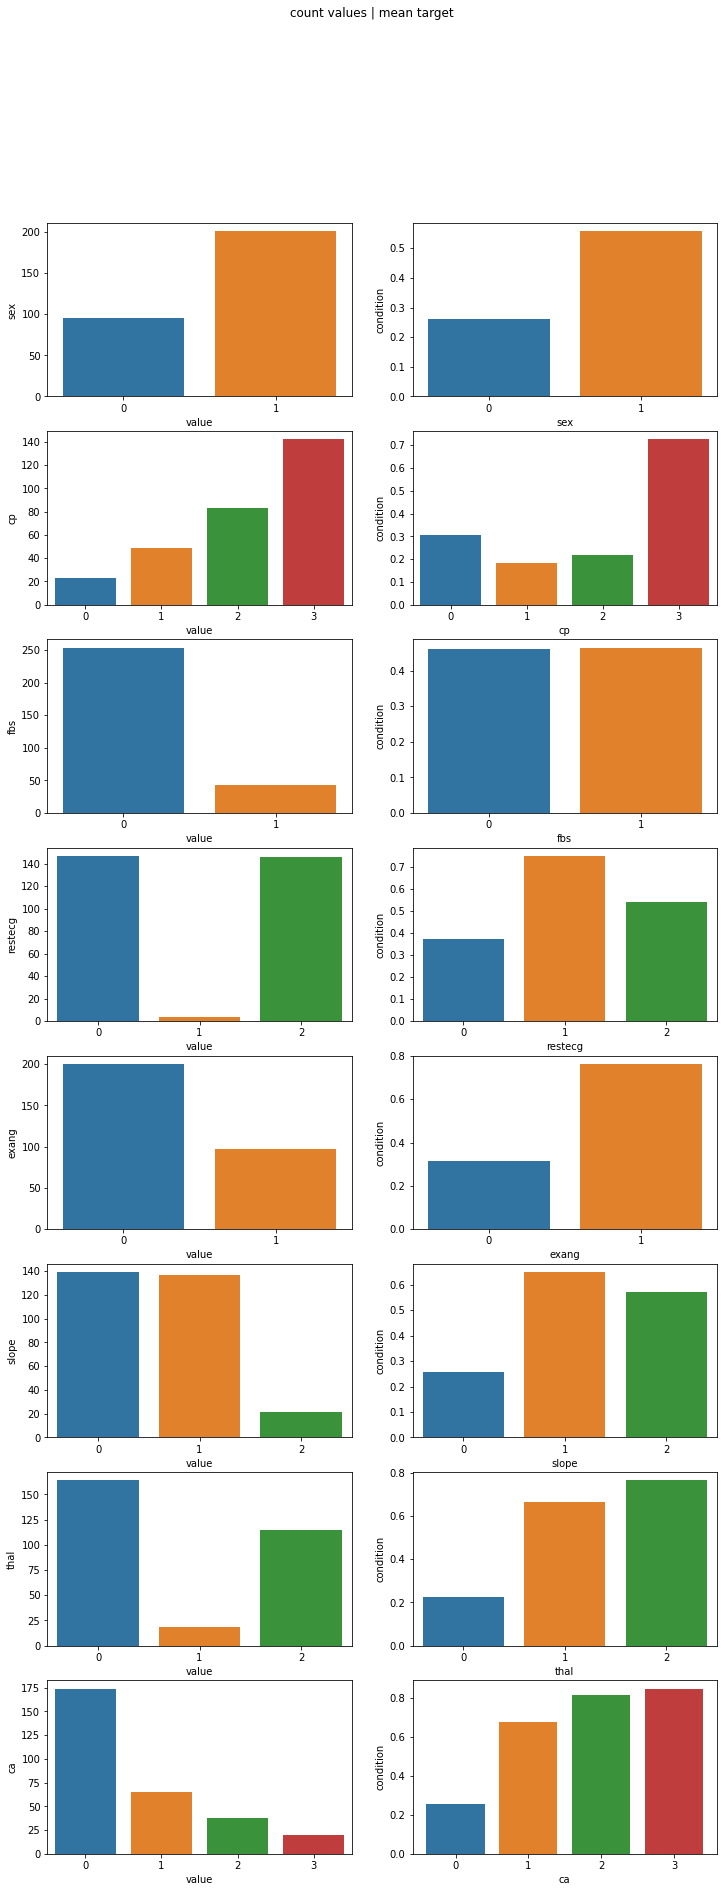

In [51]:
fig, axes = plt.subplots(len(cat_feature_list), 2, figsize=(12, 30))
plt.suptitle('count values | mean target')
for i, feature_name in enumerate(cat_feature_list):
    
    sns.barplot(
        data=df[feature_name].value_counts().reset_index().rename(columns={'index': 'value'}), 
        x='value',
        y=feature_name,
        ax=axes[i, 0]
    )
    sns.barplot(
        data=df.groupby(feature_name).mean()[[target_name]].reset_index(),
        x=feature_name,
        y='condition',
        ax=axes[i, 1]
    )

plt.plot()

# numerical features

In [54]:
num_feature_list

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

C:\Users\tarel\Documents\made\2 sem\ml_prod\homeworks-description\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[]

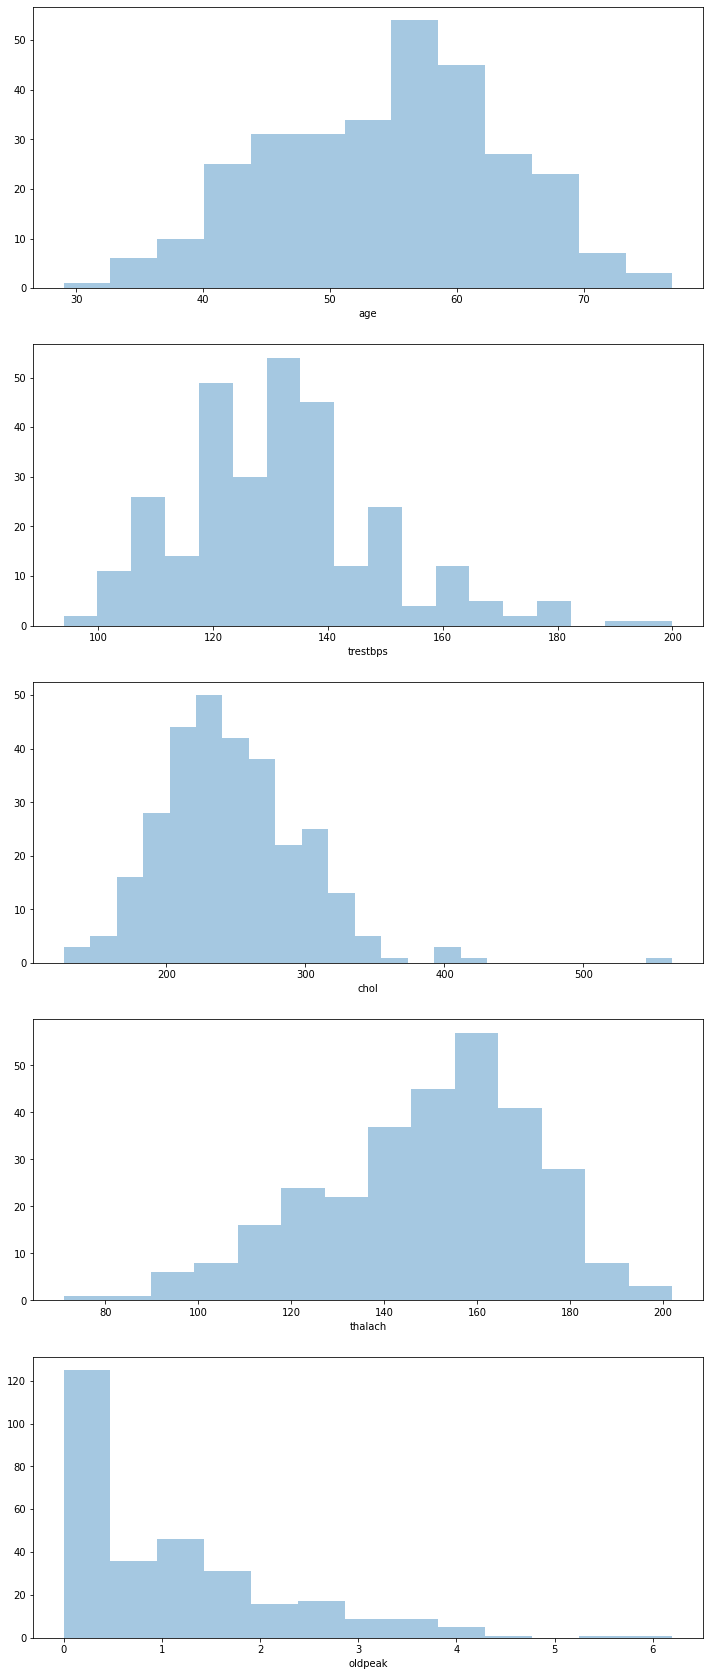

In [53]:
fig, axes = plt.subplots(len(num_feature_list), 1, figsize=(12, 30))

for i, feature_name in enumerate(num_feature_list):    
    sns.distplot(
        df[feature_name],
        kde=False,
        ax=axes[i]
    )

plt.plot()